<a href="https://colab.research.google.com/github/oksentiukpn/MA_lab/blob/main/Lab1_Calc_NameSurname_NameSurname.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Додаткове завдання 1. Похідні та методи пошуку екстремуму[❤️](https://youtu.be/dQw4w9WgXcQ?si=h-Y_1wkXwi_n54f9&t=42)

Вітаю! Це перше додаткове завдання -- лабораторна робота в якій ви зможете чисельно знайти наближене значення похідної функції в точці, спробуєте зобразити розвинення функції в ряд Тейлора, а також порівняєте кілька методів знаходження екстремуму функції.
Максимальна кількість балів за лабораторну роботу -- $\textbf{3 бали}$.

Для початку слід обрати функцію, над якою ви працюватимете:
1. $x^2 + 4sin(x)$

2. $e^{-0.5x}\cdot x$

3. $ln(x+1)-\dfrac{x}5$

4. $\sqrt{x}\cdot e^{-\frac{x}3}$

5. $3\cdot e^-\frac{(x+1)^2}{2}$

In [1]:
student_id = 21 # замініть на суму чисел свого номера телефону
assigned_function = student_id % 5 + 1
print(f"+++ Номер функції: {assigned_function} +++")

+++ Номер функції: 2 +++


Далі імпортуємо необхідні бібліотеки і починаємо!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

### Частина 1. Похідні та розвинення Тейлора (1 бал)

Для початку слід поглянути, як виглядає функція на графіку.
Намалюйте графік функцію, використовуючи numpy та matplotlib. (0.2 б)

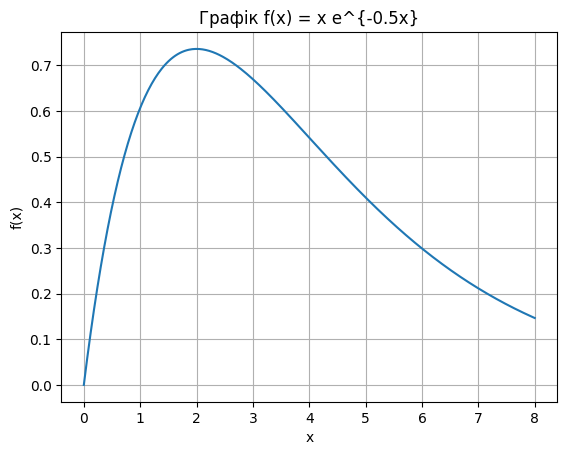

In [3]:
function = lambda x: x * np.exp(-0.5 * x) # перепишіть вашу функцію

x_values = np.linspace(0, 8, 400)
y_values = function(x_values)

# Ваш код

plt.figure()
plt.plot(x_values, y_values)
plt.title("Графік f(x) = x e^{-0.5x}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

Як ви памʼятаєте, похідна є границею відношення приростом функції до приросту її аргументу, коли приріст аргументу прямує до нуля.
$$
f'(x_0) = \lim\limits_{h \to 0 } \dfrac{f(x_0+h)-f(x_0)}{h}
$$

Ми можемо порахувати наближене значення похідної в точці, взявши дуже мале $h$.
Напишіть функцію, яка рахуватиме похідну за наданою формулою. (0.2 б)

In [5]:
from typing import Callable

def numeric_derivative(func: Callable[[float], float], x: float, h: float = 1e-7) -> float:
    """
    Обчислює похідну за стандартною формулою.
    :param func: Функція f(x), яку потрібно диференціювати.
    :param x: Точка, в якій обчислюється похідна.
    :param h: Розмір приросту (default: 1e-7).
    :return: Наближене значення f'(x).
    """
    return (func(x + h) - func(x)) / h

Існує інший метод визначення приблизного значення похідної через центральну різницю.

Детальніше можна почитати тут: https://adamdjellouli.com/articles/numerical_methods/3_differentiation/central_difference

Реалізуйте функцію, щоб порахувати наближене значення похідної в точці використовуючи центральну різницю. (0.2 б)

In [6]:
def numeric_derivative_cd(func: Callable[[float], float], x: float, h: float = 1e-7) -> float:
    """
    Обчислює похідну за формулою центральної різниці.
    :param func: Функція f(x), яку потрібно диференціювати.
    :param x: Точка, в якій обчислюється похідна.
    :param h: Розмір приросту (default: 1e-7).
    :return: Наближене значення f'(x).
    """
    return (func(x + h) - func(x - h)) / (2 * h)

Порівняйте, яка з цих функцій дає більш точне значення. Яка похибка обчислених значень? Спробуйте порахувати похибки на певному інтевралі значень та знайдіть максимальну для обох реалізацій функцій. На основі цього, оберіть якою функцією виконуватимете одну з наступним задач. (0.2 б)

In [7]:
def compare(x: float):
  func = lambda x: x * np.exp(-0.5 * x)
  derivative = (-0.5) * x * np.exp(-0.5 * x) + np.exp(-0.5 * x)
  deriv = lambda x: (-0.5) * x * np.exp(-0.5 * x) + np.exp(-0.5 * x)
  num1 = numeric_derivative(func, x)
  num2 = numeric_derivative_cd(func, x)
  err1 = abs(derivative - num1)
  err2 = abs(derivative - num2)
  x_values = np.linspace(0, 8, 400)
  deriv_values = deriv(x_values)
  deriv1_values = numeric_derivative(func, x_values)
  deriv2_values = numeric_derivative_cd(func, x_values)
  err1_d = sum([abs(deriv_values[i] - deriv1_values[i]) for i in range(400)])/400
  err2_d = sum([abs(deriv_values[i] - deriv2_values[i]) for i in range(400)])/400
  err_max = [abs(deriv_values[i] - deriv1_values[i]) for i in range(400)]
  err_max += [abs(deriv_values[i] - deriv2_values[i]) for i in range(400)]
  err_max = max(err_max)
  if err1 == err2:
    print('Функції однаково точні')
  else:
    print('Функція 1 точніша' if err1 < err2 else 'Функція 2 точніша')
  print(f'Похибка функції 1: {err1}')
  print(f'Похибка функції 2: {err2}')
  print(f'Середня похибка функції 1 на інтервалі [0, 8]: {err1_d}')
  print(f'Середня похибка функції 2 на інтервалі [0, 8]: {err2_d}')
  print(f'Максимальна похибка функцій: {err_max}')
compare(2.0)
print('***********************************')
compare(4.0)

Функція 2 точніша
Похибка функції 1: 8.881784197001252e-09
Похибка функції 2: 5.551115123125783e-10
Середня похибка функції 1 на інтервалі [0, 8]: 7.517500441034387e-09
Середня похибка функції 2 на інтервалі [0, 8]: 2.5302713674291154e-10
Максимальна похибка функцій: 4.999999869692573e-08
***********************************
Функція 2 точніша
Похибка функції 1: 8.538748597075596e-10
Похибка функції 2: 2.9876334739498134e-10
Середня похибка функції 1 на інтервалі [0, 8]: 7.517500441034387e-09
Середня похибка функції 2 на інтервалі [0, 8]: 2.5302713674291154e-10
Максимальна похибка функцій: 4.999999869692573e-08


Тепер давайте реалізуємо функцію яка рахуватиме приблизне значення другої похідної в точці. Для цього використаймо центральну різницю для другої похідної.
Давайте її виведемо!\
Друга похідна -- це "зміна нахилу", тобто зміна "стрімкості" чи швидкості функції. Щоб знайти центральну різницю, позначимо нахил попереду та позаду (крок вправо і вліво)\
$$
g_{fwd} \approx \dfrac{f(x+h)-f(x)}{h} \qquad g_{bwd} \approx \dfrac{f(x)-f(x-h)}{h}
$$
Тепер знайдемо зміну цих нахилів поділивши різницю на крок $h$.
$$
f''(x) \approx \dfrac{\dfrac{f(x+h)-f(x)}{h} - \dfrac{f(x)-f(x-h)}{h}}h
$$
$$
f''(x) \approx \dfrac{f(x+h) - 2f(x)+f(x-h)}{h^2}
$$

Тепер, реалізуйте функцію використовуючи виведену формулу❤️ (0.1 б)

In [8]:
def numeric_second_derivative(func: Callable[[float], float], x: float, h: float = 1e-5) -> float:
    """
    Обчислює другу похідну за формулою центральної різниці.❤️
    :param func: Функція f(x), яку потрібно диференціювати.❤️
    :param x: Точка, в якій обчислюється друга похідна.❤️
    :param h: Розмір приросту (default: 1e-5).❤️
    :return: Наближене значення f''(x).❤️
    """
    return (func(x + h) - 2*func(x) + func(x - h)) / (h**2)

Тепер спробуємо візулізувати декілька членів ряду Тейлора. Для цього скористаємось білбілотекою `sympy`, яка дозволяє легко працювати з функціями символьно.

Більше про те, що таке символьне обчислення, які переваги бібліотеки `sympy` та як взагалі нею користуватись, можна знайти в [документації](https://docs.sympy.org/latest/tutorials/intro-tutorial/intro.html#what-is-symbolic-computation). (0.1 б)

In [9]:
x_sym = sp.symbols('x')
f_sym = x_sym * sp.exp(-0.5 * x_sym)

def get_taylor_poly(a: float, n: int) -> Callable:
    """
    Створює поліном Тейлора n-го порядку для f_sym в точці a.
    (Використовує глобальні символьні змінні `f_sym` та `x_sym`
    для розрахунку.)
    :param a: Точка, навколо якої будується розклад (point of expansion).
    :param n: Порядок полінома.
    :return: Числова функція, готова для обчислень з numpy-масивами.

    PS:
    Використовуйте sp.lambdify(x_sym, ..., 'numpy')` для
    перетворення символьного результату (який повертає sp.series)
    на числову функцію, яку можна передати в matplotlib для подальшої візуалізації!
    """
    series = sp.series(f_sym, x_sym, a, n+1)
    poly = series.removeO()
    f_num = sp.lambdify(x_sym, poly, 'numpy')

    return f_num

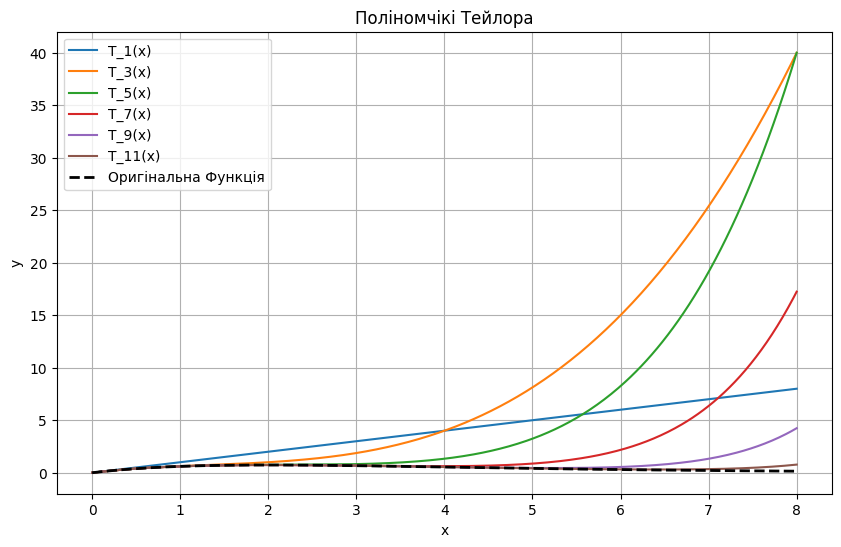

In [11]:
# Візуалізуйте кілька поліномів Тейлора

#Ваш код

x = np.linspace(0, 8, 400)
f_num = sp.lambdify(x_sym, f_sym, 'numpy')

plt.figure(figsize=(10, 6))

orders = [1, 3, 5, 7, 9, 11]

for n in orders:
    Tn = get_taylor_poly(0, n)
    plt.plot(x, Tn(x), label=f"T_{n}(x)")

plt.plot(x, f_num(x), 'k--', linewidth=2, label="Оригінальна Функція")

plt.title("Поліномчікі Тейлора")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

### Частина 2. Методи знаходження екстремуму (2 бали)

В цій частині ми порівняємо кілька методів знаходженні екстремуму: метод бісекції, метод золотого поділу, а також метод Ньютона.
Детальніше про ці методи можете почитати за посиланнями:
- Метод бісекції: https://adamdjellouli.com/articles/numerical_methods/1_root_and_extrema_finding/bisection_method
- Метод золотого поділу: https://adamdjellouli.com/articles/numerical_methods/1_root_and_extrema_finding/golden_ratio_search
- Метод Ньютона: https://adamdjellouli.com/articles/numerical_methods/1_root_and_extrema_finding/newtons_method


Як ви знаєте, екструмом функції є точка, в якій похідна дорвінює нулю. Ми можемо використати метод бісекції на похідній, знайти її нуль, а отже і точку екстремуму (0.5 б)

In [12]:
def bisection_method(func: Callable[[float], float],
                       a: float,
                       b: float,
                       tol: float = 1e-8) -> float:
    """
    Знаходить корінь похідної f'(x) на інтервалі [a, b] методом бісекції.
    Це еквівалентно пошуку локального екстремуму оригінальної функції f(x).
    :param func: базова функція f(x), екструмум якої шукаємо
    :param a: Ліва межа інтервалу.
    :param b: Права межа інтервалу.
    :param tol: Точність (критерій зупинки, default: 1e-8).
    :return: Значення x, що є коренем f'(x) (точка екстремуму).
    """
    fa = numeric_derivative_cd(func, a)
    fb = numeric_derivative_cd(func, b)

    if fa * fb > 0:
        raise ValueError("Похідна має однакові знаки на кінцях інтервалу — кореня немає або він поза межами [a, b].")

    while (b - a) / 2 > tol:
        c = (a + b) / 2
        fc = numeric_derivative_cd(func, c)

        if abs(fc) < tol:
            return c
        elif fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

    return (a + b) / 2

В методі бісекції ми ділили наш відрізок навпіл. В методі золотого поділу, ми використаємо константу золотого перетину (золоте число $\varphi$) для поділу відрізку (0.5 б)

In [18]:
def golden_section_search(func: Callable[[float], float],
                            a: float,
                            b: float,
                            tol: float = 1e-8) -> float:
    """
    Знаходить мінімум унімодальної функції f(x) на інтервалі [a, b]
    методом золотого поділу.

    :param func: базова функція f(x), екструмум якої шукаємо.
    :param a: Ліва межа інтервалу.
    :param b: Права межа інтервалу.
    :param tol: Точність (критерій зупинки, default: 1e-8).
    :return: Значення x, що мінімізує f(x) на [a, b].
    """
    phi = (1 + (5**0.5)) / 2
    resphi = 2 - phi
    x1 = b - resphi * (b - a)
    x2 = a + resphi * (b - a)
    f1 = func(x1)
    f2 = func(x2)
    while abs(b - a) > tol:
        if f1 < f2:
            # Мінімум лівіше
            b = x2
            x2 = x1
            f2 = f1
            x1 = b - resphi * (b - a)
            f1 = func(x1)
        else:
            # Мінімум правіше
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + resphi * (b - a)
            f2 = func(x2)

    return (a + b) / 2

Метод Ньютона працює наступним чином. Починається пошук у заданій точці, яка, у ідеалі, близько до кореня. У ній перевіряється значення, і якщо воно недостатньо близьке до бажаного, то наступну точку визначаємо за формулою:
                $x_{n+1} = x_n - \frac{g(x_n)}{g'(x_n)}$
Шукаємо $x_i$: $g(x_i) \approx 0$
Тут $g(x)$ - надана функція, $g'(x)$ - її похідна (шукаємо за допомогою раніше написаної функції).
Для того щоб знайти екструм, ми працюватимемо над поіхдною, отже тут $g(x_n) := f'(x_n)$ \
Відповідно її похідна вже буде другою похідною базової функції $f(x)$. (0.5 б)


In [14]:
def newtons_method(func: Callable[[float], float],
                    x0: float,
                    tol: float = 1e-8,
                    max_iter: int = 100) -> float:
    """
    Знаходить корінь похідної f'(x) методом Ньютона (методом дотичних).
    Використовує ітеративну формулу: x_n+1 = x_n - f'(x_n) / f''(x_n)
    :param func: базова функція f(x), екструмум якої шукаємо
    :param x0: Початкове наближення (точка).
    :param tol: Точність (критерій зупинки, default: 1e-8).
    :param max_iter: Максимальна кількість ітерацій.
    :return: Значення x, що є коренем f'(x) (точка екстремуму).
    """
    xn = x0
    for i in range(max_iter):
        f1 = numeric_derivative_cd(func, xn)
        f2 = numeric_second_derivative(func, xn)

        # Перевірка, щоб не ділити на нуль
        if abs(f2) < 1e-12:
            break

        x_next = xn - f1 / f2

        if abs(x_next - xn) < tol:
            return float(x_next)

        xn = x_next
    return float(xn)

Порівняйте ці методи (за потреби можете написати додатковий скрипт) які з цих методів є більш ефективними, які дають більш точні результати? (0.5 б)

Аналітично: x* = 2.0 , f(x*) = 0.7357588823428847
Бісекція: x* ≈ 2.0 , |похибка| = 0.0
Золотий поділ: x* ≈ 2.21114561914073 , |похибка| = 0.21114561914072993
Ньютон (x0=0.5): x* ≈ 1.9999999981387901 , |похибка| = 1.8612098529047216e-09


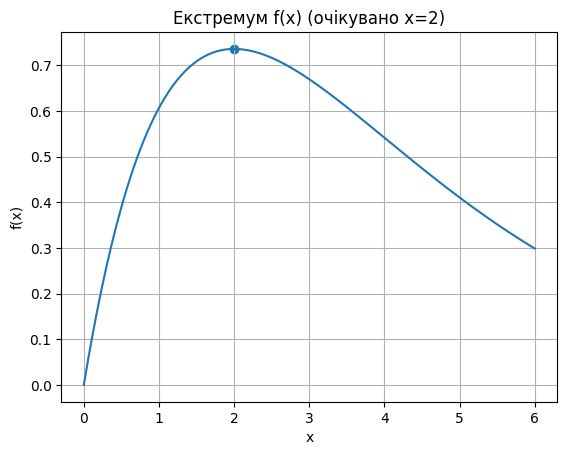

In [19]:
# Аналітична перевірка: f'(x) = e^{-0.5x}(1 - 0.5x) -> корінь у x=2
true_extremum_x = 2.0
true_extremum_f = function(true_extremum_x)
print("Аналітично: x* =", true_extremum_x, ", f(x*) =", true_extremum_f)

x_bis = bisection_method(function, 0.0, 8.0)
print("Бісекція: x* ≈", x_bis, ", |похибка| =", abs(x_bis - true_extremum_x))

x_gss = golden_section_search(function, 0.0, 8.0)
print("Золотий поділ: x* ≈", x_gss, ", |похибка| =", abs(x_gss - true_extremum_x))

x_newton_1 = newtons_method(function, x0=0.5)
print("Ньютон (x0=0.5): x* ≈", x_newton_1, ", |похибка| =", abs(x_newton_1 - true_extremum_x))

# Невелика візуалізація околу екстремуму
xp = np.linspace(0, 6, 400)
yp = function(xp)
plt.figure()
plt.plot(xp, yp)
plt.scatter([true_extremum_x], [true_extremum_f])
plt.title("Екстремум f(x) (очікувано x=2)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

# Висновки🎉
- Центральна різниця зазвичай дає меншу похибку, ніж пряма формула різниці (що підтвердилось на тестовому інтервалі).
- Для $f(x)=x e^{-0.5x}$ аналітичний екстремум у точці $x=2$. Усі методи збігаються до розв'язку на інтервалі [0,8].
- Метод золотого поділу надійний для унімодальних інтервалів (тут для максимуму використовували мінімізацію $-f$).
- Метод Ньютона дуже швидкий поблизу розв'язку, але потребує обережного вибору старту та не нульової другої похідної.
- Бісекція повільніша, але гарантовано збігається за наявності зміни знаку похідної на кінцях.

Вітаю! Вам лишилось трохи порефлексувати. Напишіть висновки, в якій опишіть роботу, яку ви проробили, результати обчислювальних методів, оцініть їхню ефективність.